In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
import warnings
warnings.filterwarnings('ignore')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


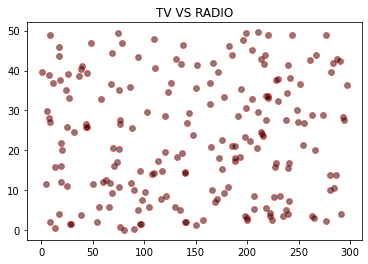

In [11]:
plt.scatter(df['TV'],df['radio'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title("TV VS RADIO")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


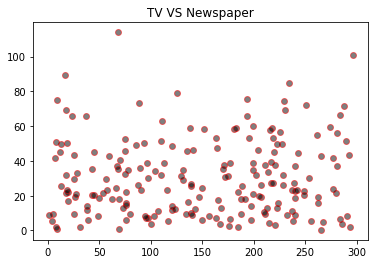

In [12]:
plt.scatter(df['TV'],df['newspaper'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title("TV VS Newspaper")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


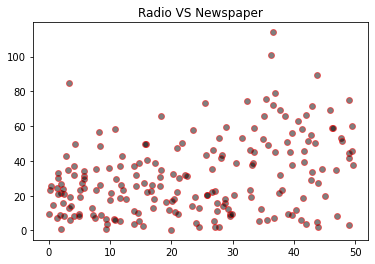

In [13]:
plt.scatter(df['radio'],df['newspaper'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title("Radio VS Newspaper")
plt.show()

In [14]:
corr_mat = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

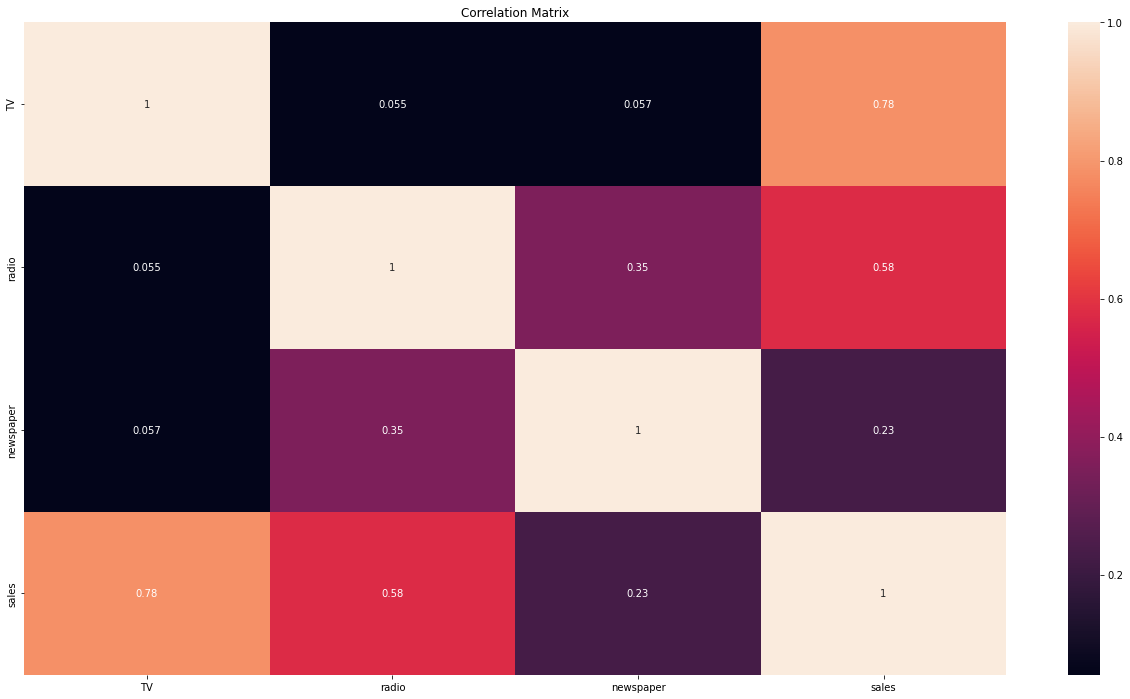

In [15]:
#Visualising heatmap for corr_mat and concluded that  all our features are not corelated
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show

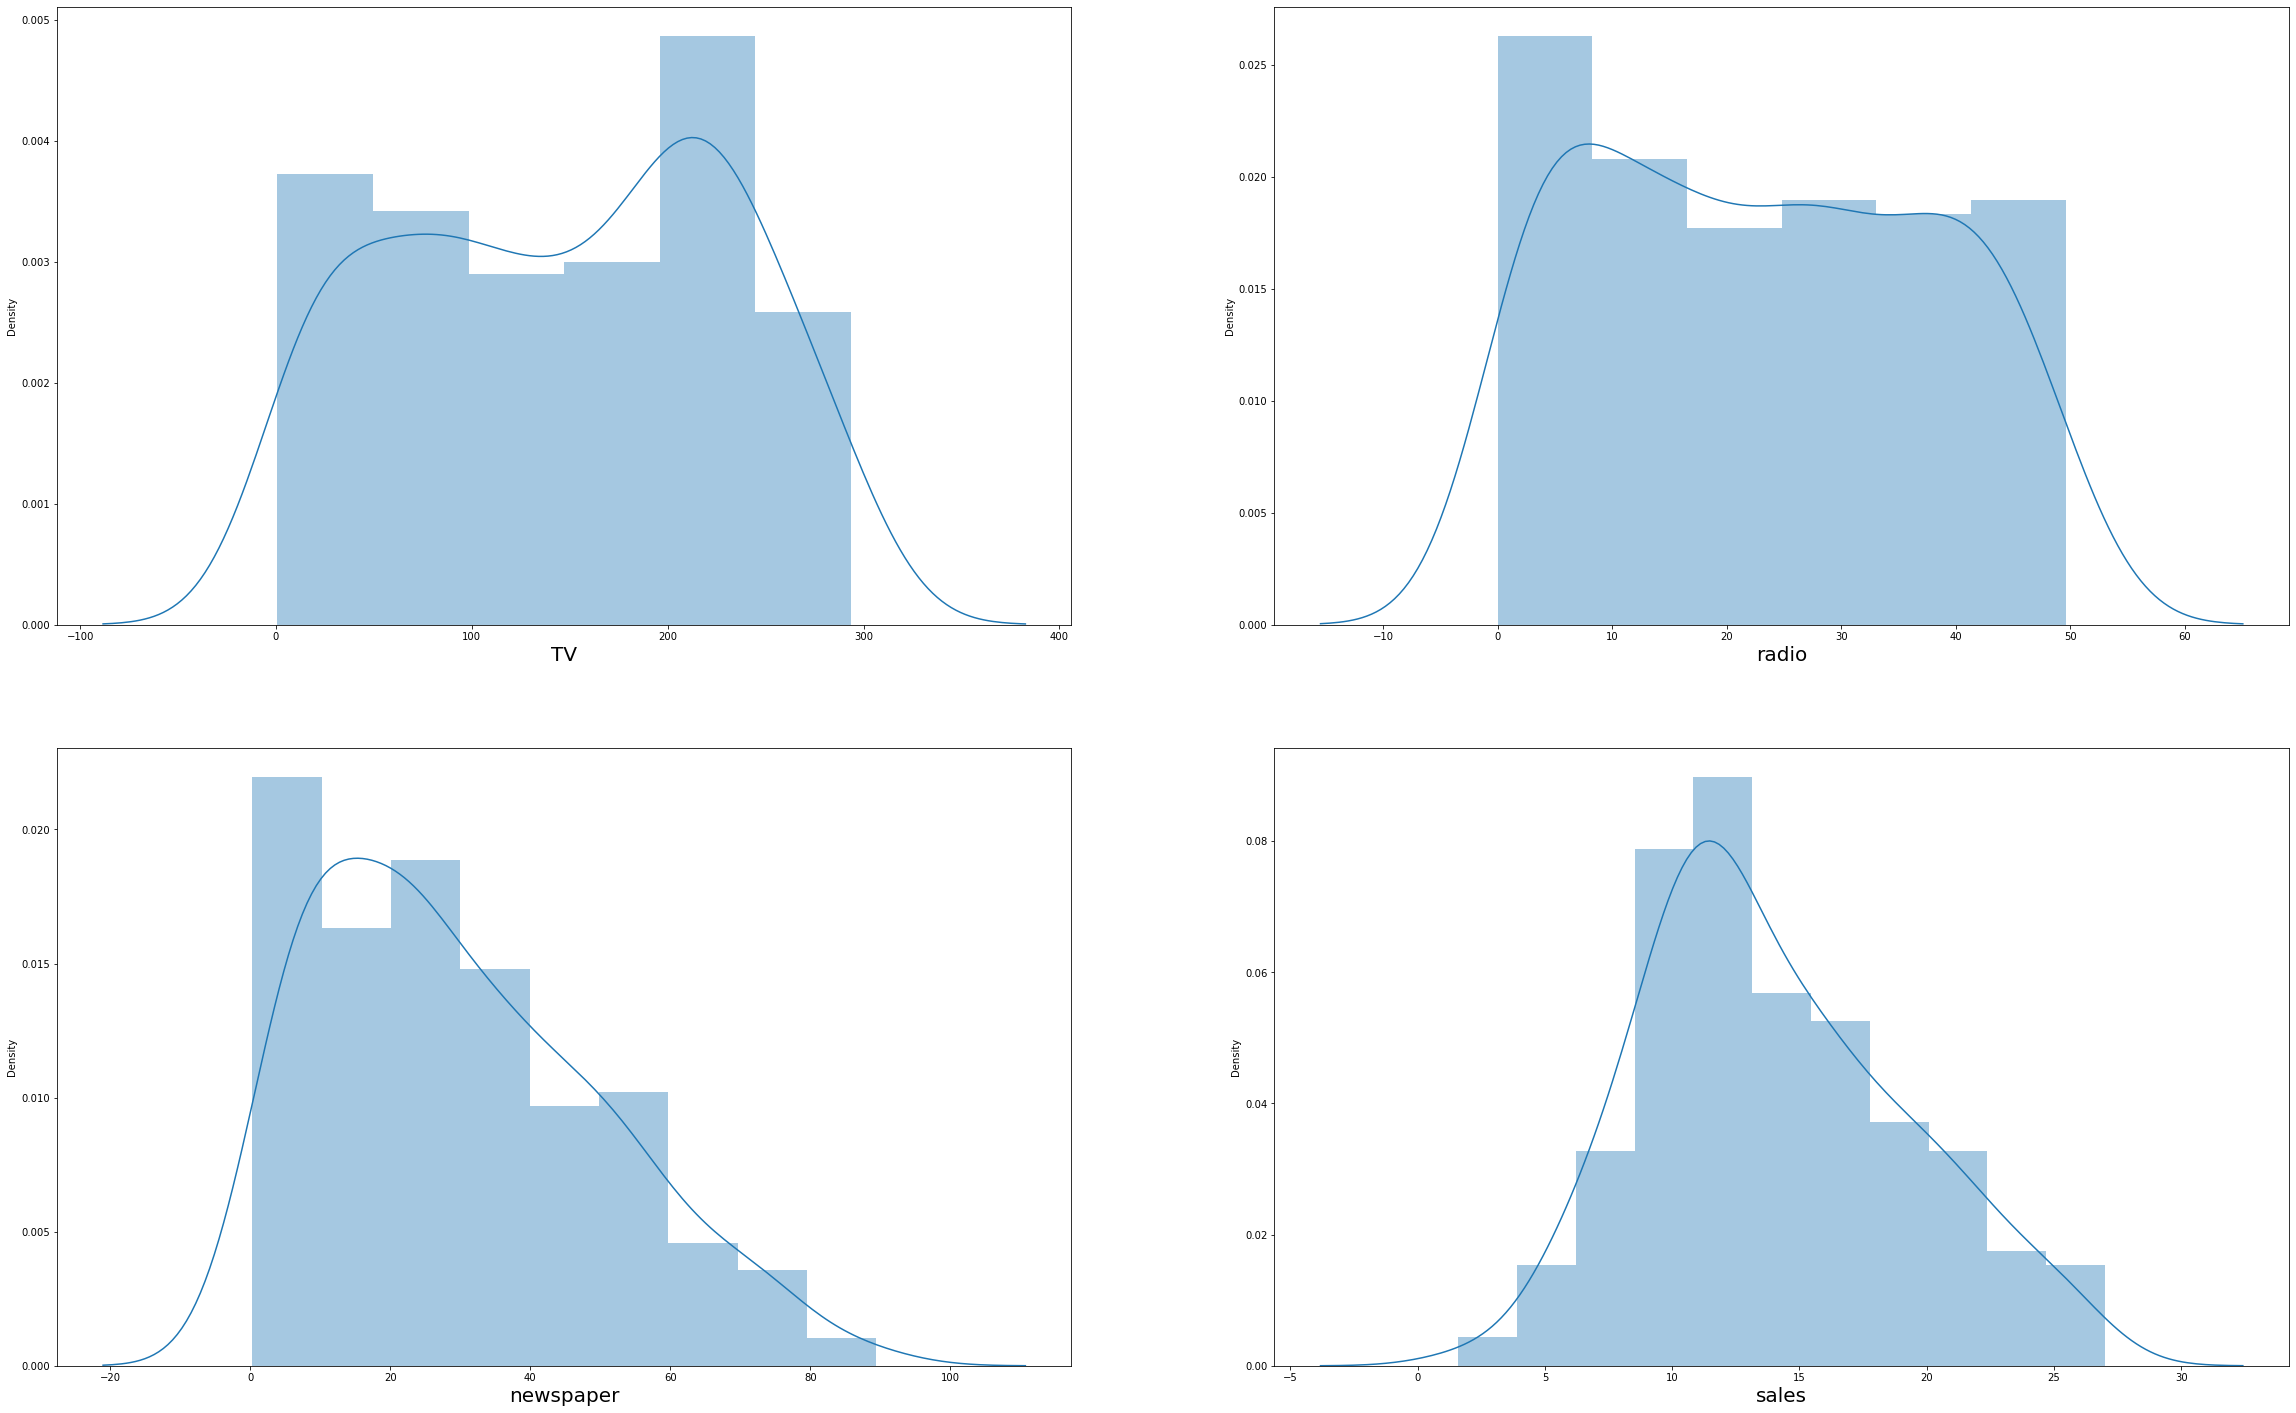

In [58]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=4:
            ax = plt.subplot(2,2,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

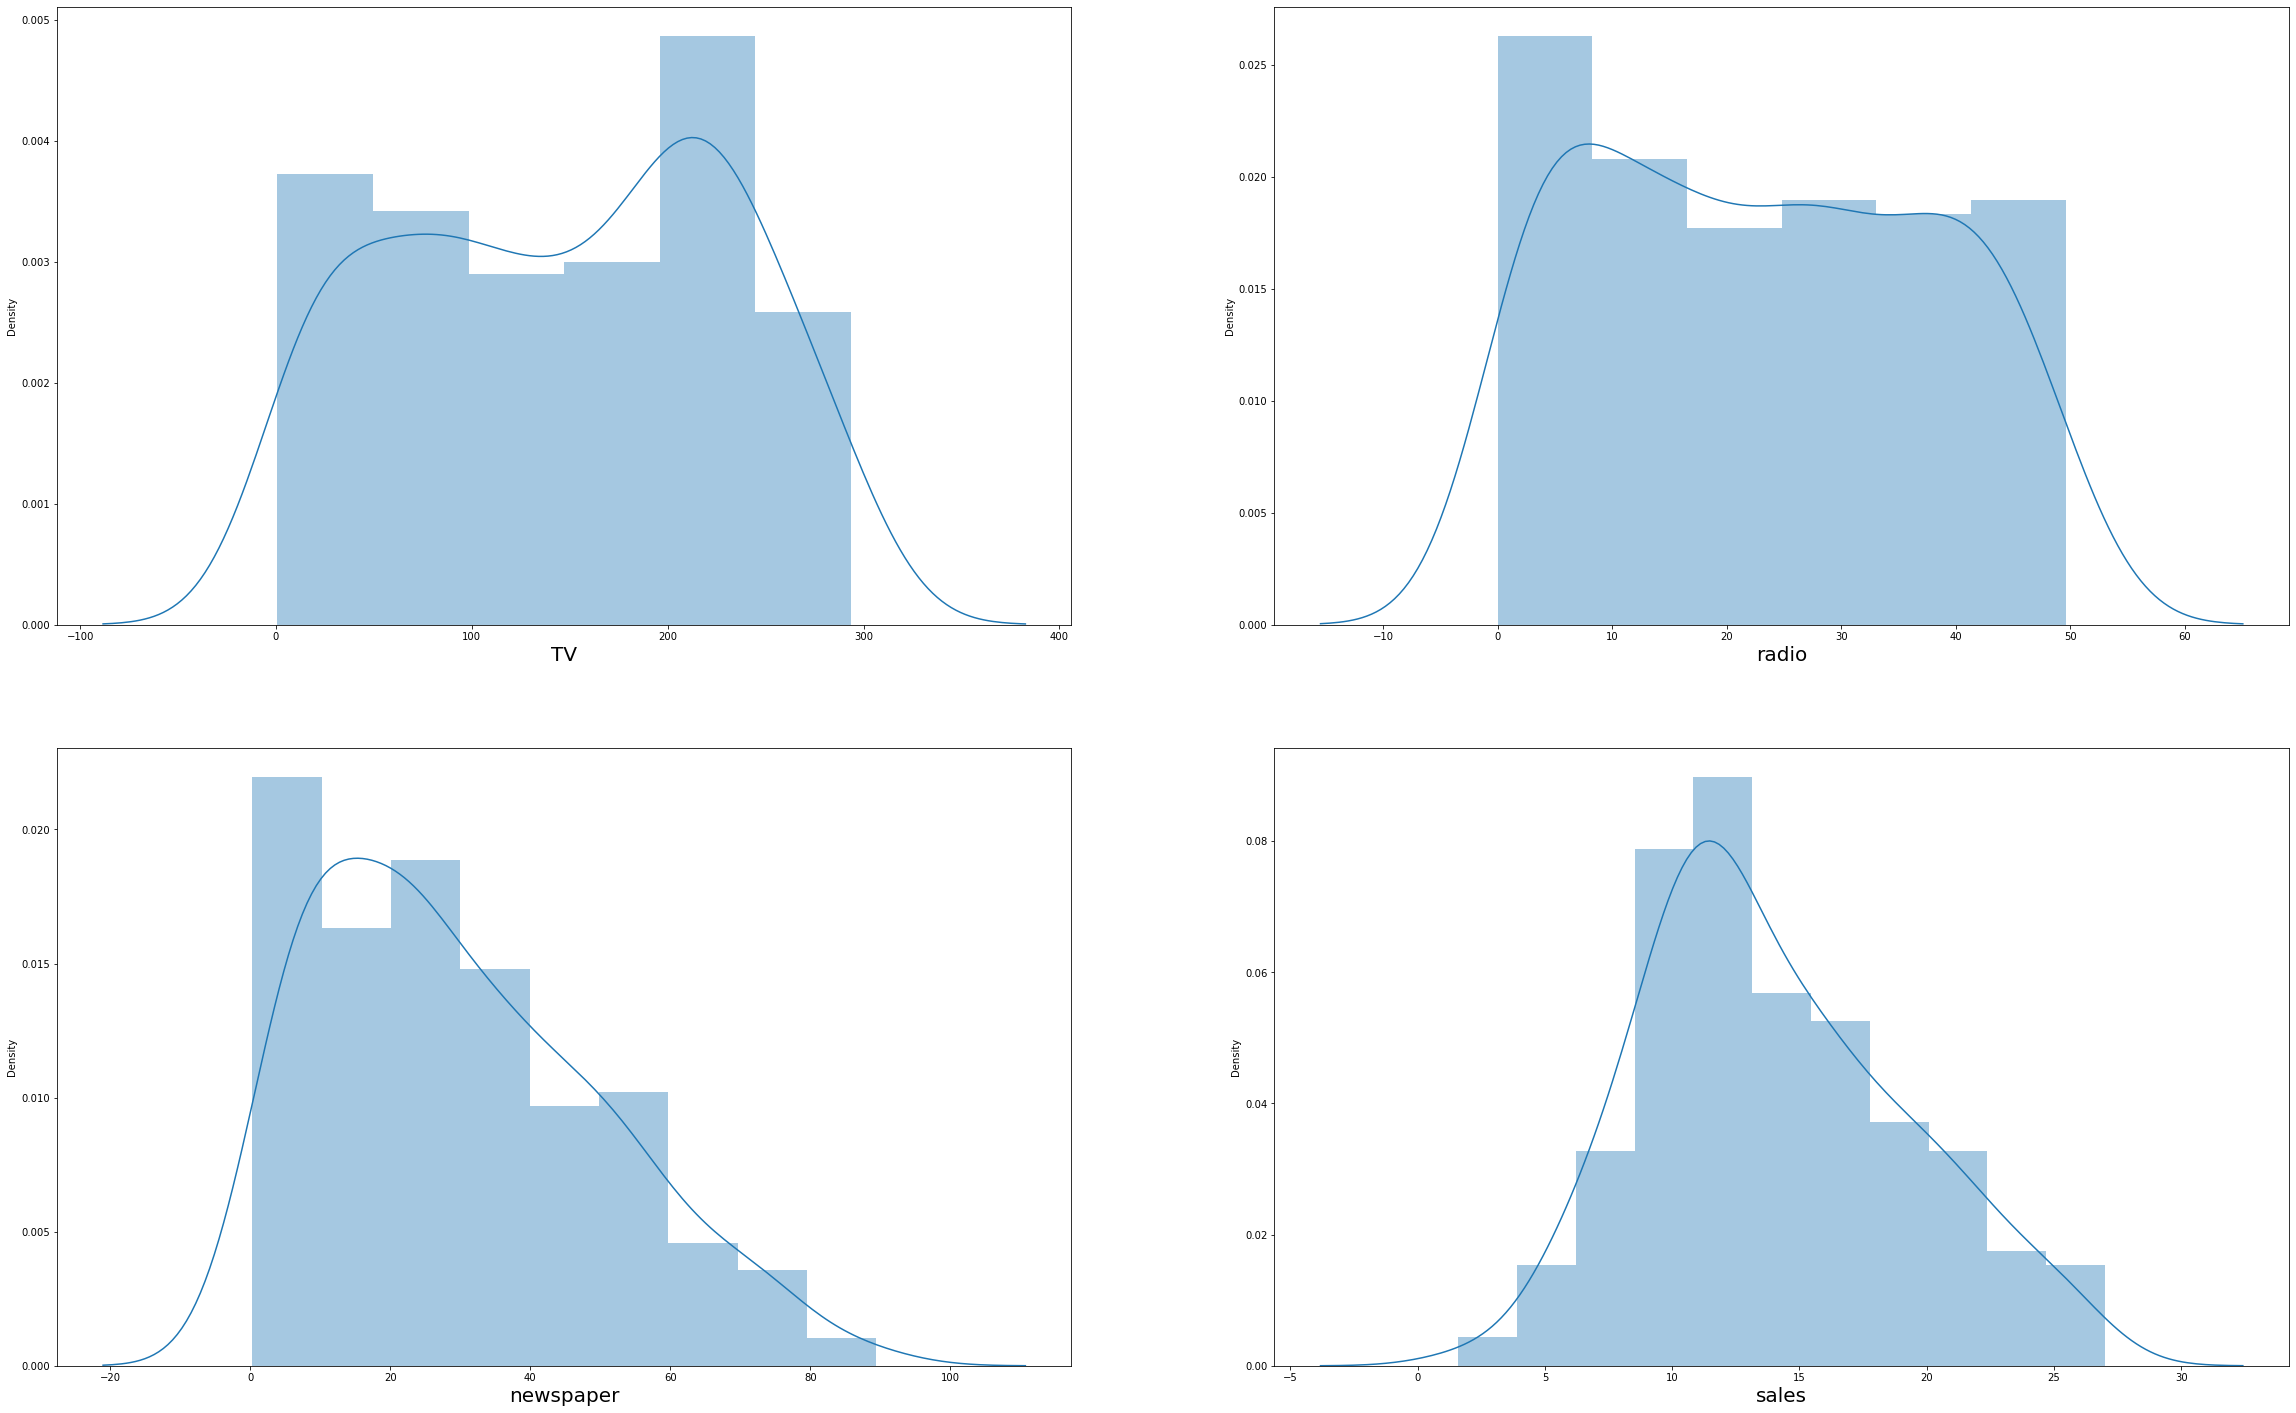

In [59]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=4:
            ax = plt.subplot(2,2,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

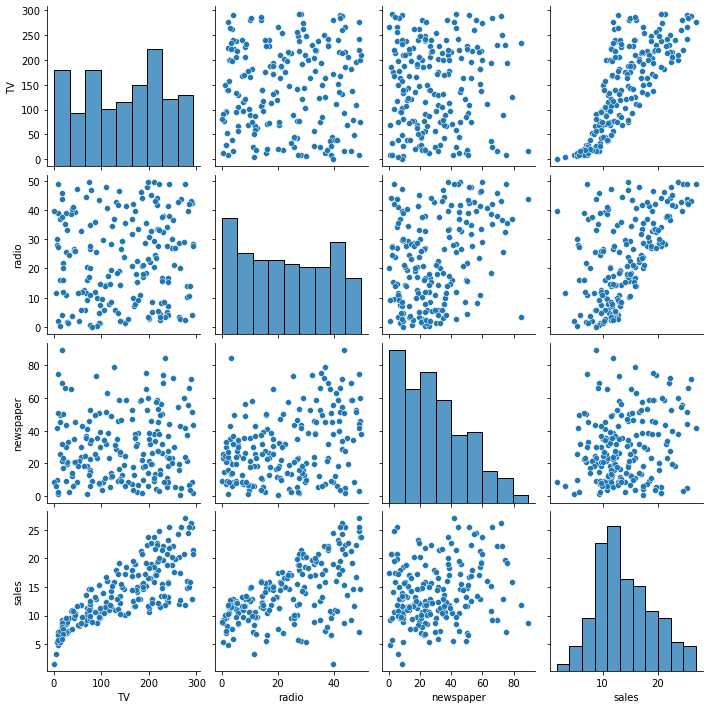

In [60]:
sns.pairplot(df)

In [61]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [20]:
#Removing Outliers
from scipy import stats

z = np.abs(stats.zscore(df))
index = (np.where(z > 3)[0])

df = df.drop(df.index[index])

In [21]:
df.shape

(198, 4)

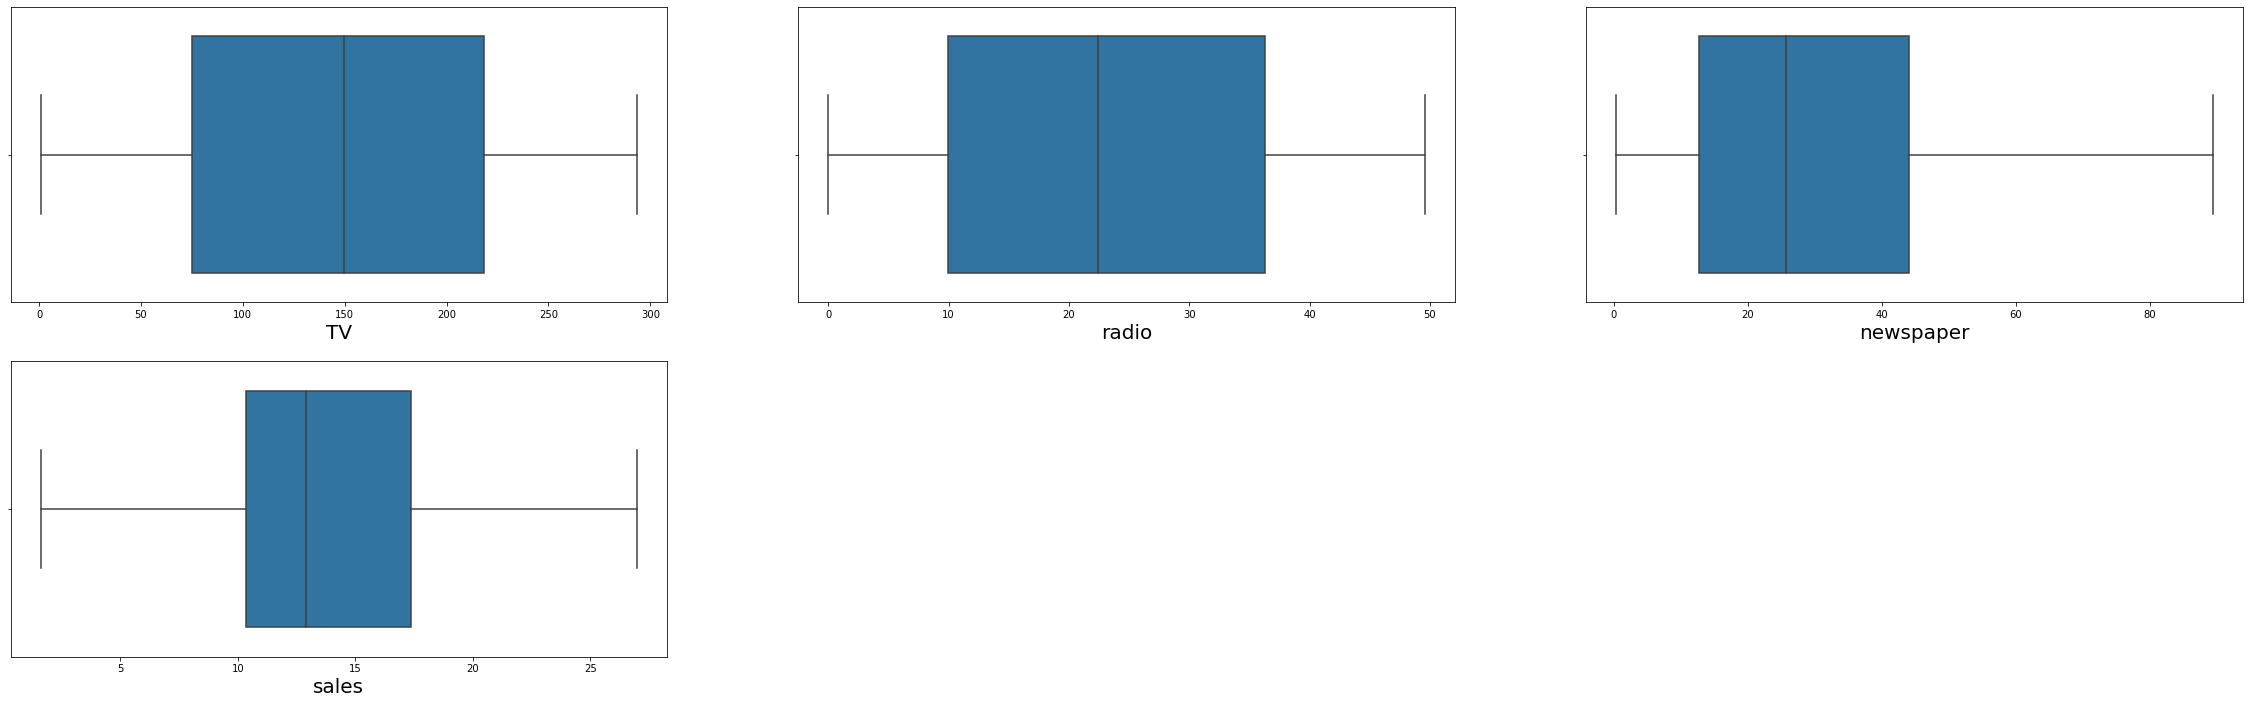

In [62]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=12:
            ax = plt.subplot(4,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [23]:
#seperating my features and label
X = df.drop('sales',axis=1)
y = df['sales']

In [63]:
from sklearn.preprocessing import power_transform
X = power_transform(X)

In [64]:
# to scale my features.
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=2)

In [66]:
from sklearn.neighbors import KNeighborsRegressor  # k=3
knn = KNeighborsRegressor(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(x_train,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(x_test) #Predict

In [30]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)

In [31]:
print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 1.6177745344900334
The r2-score is: 0.9090396016931055


In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train , y_train)
pred = lr.predict(x_test)

In [67]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_test, pred))
r2_1 = r2_score(y_test, pred)

In [68]:
print("The root mean Sq error calculated from the base model is:",rmse1)
print("The r2-score is:",r2_1)

The root mean Sq error calculated from the base model is: 1.9409584147075782
The r2-score is: 0.8690670885581865


In [69]:
# using Decision tree regressor to my dataset
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor() #Instantiate the LogisticRegression object
DT.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = DT.predict(x_test) #Predict

In [70]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_2 = r2_score(y_test, y_pred)

In [71]:
print("The root mean Sq error calculated from the base model is:",rmse2)
print("The r2-score is:",r2_2)

The root mean Sq error calculated from the base model is: 1.1979148550710939
The r2-score is: 0.9501266817039645


In [72]:
#Building SVR Model
from sklearn.svm import SVR
svr = SVR() #Instantiate the LogisticRegression object
svr.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = svr.predict(x_test) #Predict

In [73]:
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_3 = r2_score(y_test, y_pred)

In [74]:
print("The root mean Sq error calculated from the base model is:",rmse3)
print("The r2-score is:",r2_3)

The root mean Sq error calculated from the base model is: 1.7371082876263277
The r2-score is: 0.895125440850937


In [75]:
#Building RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() #Instantiate the LogisticRegression object
rf.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = rf.predict(x_test) #Predict

In [76]:
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_4 = r2_score(y_test, y_pred)

In [77]:
print("The root mean Sq error calculated from the base model is:",rmse4)
print("The r2-score is:",r2_4)

The root mean Sq error calculated from the base model is: 0.895160600115978
The r2-score is: 0.972150443646626


In [78]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [79]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [80]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [81]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [82]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [83]:
rf_Grid.best_score_

0.96401012615424

In [50]:
#Building RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=10,bootstrap=True,max_depth=4,max_features='auto',min_samples_leaf=1,min_samples_split=2) #Instantiate the LogisticRegression object
rf1.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = rf1.predict(x_test)

In [51]:
rmse5 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_5 = r2_score(y_test, y_pred)

In [52]:
print("The root mean Sq error calculated from the base model is:",rmse5)
print("The r2-score is:",r2_5)

The root mean Sq error calculated from the base model is: 1.1117423196767175
The r2-score is: 0.9570439203083398


In [84]:
#Saving the model in pkl file
import joblib
joblib.dump(rf,"bigdata.pkl")

['bigdata.pkl']

In [85]:
model = joblib.load("bigdata.pkl")

In [86]:
#Predicting the saved model
prediction = model.predict(x_test)

In [87]:
#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

In [88]:
#Saving the result into CSV
prediction.to_csv("Sales.csv",index=True)